# Сборный проект_Анализ российского кинопроката

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Обработка пустых значений](#Предобработка_пустоты)
    * [Преобразование типов данных в столбцах таблицы](#Предобработка_типы)
    * [Проверка датасета на наличие дубликатов](#Предобработка_дубликаты)
    * [Инициализация новых столбцов в наборе данных](#Предобработка_столбцы)
* [Исследовательский анализ данных](#Исследование)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>


Заказчик исследования: `Министерство культуры Российской Федерации`.

Цель исследования: `Анализ рынка российского кинопроката и выявление текущих трендов`.

Задачи исследования:
1. Проведение предварительной обработки данных;
2. Проведение исследовательского анализа данных;
3. Формирование портрета российского кинопроката;
4. Подготовка выводов и формирование рекомендаций для принятия решений по развитию отечественного кинопроизводства.

Располагаемые данные:
* `mkrf_movies` - данные о прокатных удостоверениях;
* `mkrf_shows` - данные о прокате в российских кинотеатрах.

Датасет `mkrf_movies`:
* **title** — название фильма;
* **puNumber** — номер прокатного удостоверения;
* **show_start_date** — дата премьеры фильма;
* **type** — тип фильма;
* **film_studio** — студия-производитель;
* **production_country** — страна-производитель;
* **director** — режиссёр;
* **producer** — продюсер;
* **age_restriction** — возрастная категория;
* **refundable_support** — объём возвратных средств государственной поддержки;
* **nonrefundable_support** — объём невозвратных средств государственной поддержки;
* **financing_source** — источник государственного финансирования;
* **budget** — общий бюджет фильма;
* **ratings** — рейтинг фильма на КиноПоиске;
* **genres** — жанр фильма.

Датасет `mkrf_shows`:
* **puNumber** — номер прокатного удостоверения;
* **box_office** — сборы в рублях;


## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных **mkrf_movies** и **mkrf_shows** для хранения загруженных датасетов;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Формирование вывода по итогам данного этапа.

In [100]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np
import datetime

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# инициализация переменной mkrf_movies - запись соответствующего набора данных
try:
    mkrf_movies = pd.read_csv('C:/Users/User/Desktop/YandexPractikum_projects/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')

#вывод структуры датасета на экран
display(mkrf_movies.head())

# вывод на экран общей информации о наборе данных
display(mkrf_movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

In [102]:
# инициализация переменной mkrf_shows - запись соответствующего набора данных
try:
    mkrf_shows = pd.read_csv('C:/Users/User/Desktop/YandexPractikum_projects/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

#вывод структуры датасета на экран
display(mkrf_shows.head())

# вывод общей информации на экран
display(mkrf_shows.info())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

**Вывод**:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot** и **seaborn**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменные **mkrf_shows** и **mkrf_movies** для хранения загруженных датасетов;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Наборы данных характеризуется следующими показателями:
    * `mkrf_movies`:
        * 7 486 - количество строк в датасете;
        * 15 - количество показателей, описывающих объект;
        * 12 столбцов, имеющих явный тип 'object';
        * 3 столбца, имеющих явный тип 'float';
        * 332 - самое минимальное количество непустых значений в столбце (признаки 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source');
    * `mkrf_shows`:
        * 3 158 - количество строк в датасете;
        * 2 - количество показателей, описывающих объект;
        * 1 столбец, имеющих явный тип 'int';
        * 1 столбец, имеющих явный тип 'float';
        * набор данных не содержит пустых значений;   

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Преобразование типов данных в столбцах таблицы;
2. Обработка пустых значений в данных;
3. Проверка датасета на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
4. Изучение состояния столбцов с количественными значениями:
    * Поиск и обработка аномалий в столбцах;
    * Поиск и обработка ошибок;
5. Инициализация новых столбцов в наборе данных:
    * Год проката фильма;
    * Имя и фамилия режиссера фильма;
    * Основной жанр фильма;
    * Доля государственной поддержки от общего бюджета фильма;
6. Формирование вывода по итогам данного этапа.

### Преобразование типов данных в столбцах таблиц <a class = 'anchor' id = 'Преобразование_типы'></a>

Необходимо преобразовать типы данных следующих показателей:

`mkrf_movies`:
* **show_start_date** - дата премьеры фильма;
* **ratings** - рейтинг фильма на КиноПоиске;

`mkrf_shows`:
* **puNumbers** - номер прокатного удостоверения.


In [103]:
# преобразование типов данных столбцов в датасете 'mkrf_movies'
mkrf_movies['show_start_date'] = mkrf_movies['show_start_date'].str.slice(start=0, stop=10)
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format = '%Y-%m-%d')
mkrf_movies['ratings'] = pd.to_numeric(mkrf_movies['ratings'], errors = 'coerce')

# преобразование типов данных столбцов в датасете 'mkrf_shows'
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')

In [104]:
# вывод на экран текущих типов данных в столбцах датасетов
print('Типы данных в датасете mkrf_movies после преобразования:')
display(mkrf_movies.dtypes)
print()
print('Типы данных в датасете mkrf_shows после преобразования:')
display(mkrf_shows.dtypes)

Типы данных в датасете mkrf_movies после преобразования:


title                            object
puNumber                         object
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
dtype: object


Типы данных в датасете mkrf_shows после преобразования:


puNumber       object
box_office    float64
dtype: object

### Обработка пустых значений в данных <a class = 'anchor' id = 'Предобработка_пустоты'></a>

Пустые значения имеются в наборе `mkrf_movies`, в то время как в наборе `mkrf_shows` таковых не обнаружено.

Работа в этом подразделе направлена на обработку пустот в `mkrf_movies`.

In [105]:
# вывод на экран информации о пропущенных значениях

emptyValues_info = (mkrf_movies.isna().sum() # формирование свода о суммарном количестве пустых значений по столбцам
                    .to_frame().rename(columns = ({0 : 'empty_values'}))) # преобразование к типу датафрейм и переименование столбца
emptyValues_info['%_empty'] = round(emptyValues_info['empty_values'] / len(mkrf_movies) * 100, 2)
display(emptyValues_info.sort_values(by = 'empty_values', ascending = False))

print(f'Количество объектов в наборе данных ДО преобразования пустых значений:', mkrf_movies.shape[0])

,empty_values,%_empty
refundable_support,7154,95.57
nonrefundable_support,7154,95.57
budget,7154,95.57
financing_source,7154,95.57
ratings,996,13.30
genres,976,13.04
producer,568,7.59
film_studio,18,0.24
director,9,0.12
production_country,2,0.03


Количество объектов в наборе данных ДО преобразования пустых значений: 7486


**Вывод по итогу построения свода**:

1. Количество пустых значений в столбцах **director**, **film_studio**, **production_country**, **title** крайне мало. **Исключение таких объектов из общего набора не повлияет на общую картину**;
2.  Пустые значения в категориальных параметрах **genres**, **producer**, **financing_source** можно заменить на значение "Неизвестно" - таким образом, мы можем в дальнейшем осуществлять группировку по данной категории;
3. Для количественных параметров **refundable_support**, **nonrefundable_support** пустые значения можно заменить на 0.0, так как по вводной от заказчика указано: столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. А два других столбца являются производной информацией от данных в показателе **budget**.

При этом, сам столбец **budget** заполнять нулевыми значениями неверно, так как отсутствие информации о бюджете не означает, что бюджета как такого у фильма нет.

In [106]:
# исключим пустые объекты из общего набора по параметрам 'production_country', 'film_studio' и 'director'
for feature in ['production_country', 'film_studio', 'director', 'puNumber']:
    mkrf_movies = mkrf_movies.dropna(subset = feature)

# замена пустых значений в категориальных параметрах 'genres', 'producer', 'financing_source'
mkrf_movies[['genres', 'producer', 'financing_source']] = mkrf_movies[['genres', 'producer', 'financing_source']].fillna('Неизвестно')

# замена пустых значений в количественных параметрах 'refundable_support', 'nonrefundable_support'
mkrf_movies[['refundable_support', 'nonrefundable_support']] = mkrf_movies[['refundable_support', 'nonrefundable_support']].fillna(0.0)

In [107]:
# вывод на экран статистики после внесения изменений в данные
(display(mkrf_movies.isna().sum()
 .to_frame().rename(columns = ({0 : 'empty_values'})).sort_values(by = 'empty_values', ascending = False)))

print(f'Количество объектов в наборе данных ПОСЛЕ преобразования пустых значений:', mkrf_movies.shape[0])

,empty_values
budget,7127
ratings,977
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0
production_country,0
director,0
producer,0


Количество объектов в наборе данных ПОСЛЕ преобразования пустых значений: 7459


### Обработка дубликатов в наборе данных <a class = 'anchor' id = 'Предобработка_дубликаты'></a>

In [108]:
# вывод на экран информации по явным дубликатам в наборах данных
print('Количество явных дубликатов в наборе данных mkrf_movies:', mkrf_movies.duplicated().sum())
print('Количество явных дубликатов в наборе данных mkrf_shows:', mkrf_shows.duplicated().sum())

Количество явных дубликатов в наборе данных mkrf_movies: 0
Количество явных дубликатов в наборе данных mkrf_shows: 0


**В наборах данных отсутствуют явные дубликаты**.

В следующих шагах необходимо детально рассмотреть наборы данных на задвоение значений в столбцах, имеющих категориальные признаки.

In [109]:
# вывод на экран количества дубликатов в поле с номером прокатного удостоверения - 'puNumber' - в датасете 'mkrf_shows'
print('Количество дубликатов в столбце puNumber датасете mkrf_shows:', mkrf_shows['puNumber'].duplicated().sum())

Количество дубликатов в столбце puNumber датасете mkrf_shows: 0


In [110]:
# вывод на экран количества дубликатов в полях с номером прокатного удостоверения и названием фильма - 'puNumber' и 'title' - в датасеет 'mkrf_movies'
for feature in ['puNumber', 'title']:
    print(f'Количество дубликатов в параметре {feature}:', mkrf_movies[feature].duplicated().sum())

Количество дубликатов в параметре puNumber: 2
Количество дубликатов в параметре title: 713


In [111]:
#вывод на экран информации по объектам с одинаковым номером прокатного удостоверения
display(mkrf_movies[mkrf_movies['puNumber'].duplicated()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Неизвестно,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Неизвестно,6.8,"комедия,криминал"


Не совсем понятно, почему разные значения прокатного удостоверения выявлены как дубликаты - возможно, здесь присутствует техническая ошибка в данных.

**Исключение данных объектов из общего набора не повлияет на общую картину**.

Дубликаты в столбце **title** не являются ошибкой - фильмы с одинаковым названием могут выходить в прокат в разное время в зависимости от выдачи удостоверения прокатчику.

In [112]:
# исключаем из датасета объекты с дубликатами прокатного удостоверения
mkrf_movies = mkrf_movies.drop_duplicates(subset = 'puNumber', keep  = 'first')

In [113]:
# инициализация пользовательской функции по формированию свода уникальных значений по столбцу таблицы
def unique_values (df: pd.DataFrame, feature: str):
    print(f'Уникальные значения столбца {feature}')
    display(pd.Series(df[feature].unique()))

In [114]:
# вывод на экран уникальных значений показателя 'type'
unique_values(mkrf_movies, 'type')

Уникальные значения столбца type


0                Художественный
1                  Анимационный
2                        Прочие
3                Документальный
4             Научно-популярный
5                Художественный
6                  Анимационный
7    Музыкально-развлекательный
dtype: object

В столбце **type** задвоены значения "Художественный" и "Анимационный".

Скорее всего перед основным значением категории есть невидимые знаки: пробелы или табуляция.

In [115]:
# вывод на экран уникальных значений столбца 'type' в формате списка
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [116]:
# очистка значений столбца 'type' от невидимых знаков
mkrf_movies['type'] = mkrf_movies['type'].str.strip()

# вывод на экран уникальных значений показателя 'type'
unique_values(mkrf_movies, 'type')

Уникальные значения столбца type


0                Художественный
1                  Анимационный
2                        Прочие
3                Документальный
4             Научно-популярный
5    Музыкально-развлекательный
dtype: object

In [117]:
# вывод на экран уникальных значений показателя 'age_restriction'
unique_values(mkrf_movies, 'age_restriction')

Уникальные значения столбца age_restriction


0               «18+» - запрещено для детей
1             «6+» - для детей старше 6 лет
2           «12+» - для детей старше 12 лет
3           «16+» - для детей старше 16 лет
4    «0+» - для любой зрительской аудитории
dtype: object

Для показателя **age_restriction** выполним небольшую обработку значений - **извлечем показатель возрастной категории, а остальное описание удалим**.

In [118]:
# извлечение значений возрастной категории
mkrf_movies['age_restriction'] = mkrf_movies['age_restriction'].str.slice(start = 0, stop = 4)
# замена оставшихся символов
for symb in ['«', '»']:
    mkrf_movies['age_restriction'] = mkrf_movies['age_restriction'].str.replace(symb, '')
# вывод на экран обновленных значений
mkrf_movies['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

In [119]:
# вывод на экран уникальных зачений показателя 'financing_source'
unique_values(mkrf_movies, 'financing_source')

Уникальные значения столбца financing_source


0                          Неизвестно
1               Министерство культуры
2                           Фонд кино
3    Министерство культуры, Фонд кино
dtype: object

В остальных категориальных столбцах сочетания значений жанров (**genres**), киностудии, выпустившей фильм (**film_studio**), страны производства (**production_country**), продюссеров фильма (**producer**) формируют большое количество уникальных значений и изучить информацию о них на данном шаге не представляется возможным.

По столбцу с данными о режиссере фильма (**director**) тоже проблематично изучить уникальные значения имен, так как режиссеров слишком много для вывода их на экран.


### Изучение состояния столбцов с количественными переменными <a class = 'anchor' id = 'Предобработка_количественные'></a>

In [120]:
# формирование списка названий столбцов, содержащих количественные значения
num_values = mkrf_movies.select_dtypes(include = ['float', 'int']).columns.to_list()

# вывод на экран значений списка
print(num_values)

['refundable_support', 'nonrefundable_support', 'budget', 'ratings']


In [121]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature}', fontsize = 10)
    plt.xlabel(feature)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

    # вывод на экран объектов, с значениями, превышающими верхнюю границу
    print('Названия фильмов, значения которых по метрике превышают верхнюю границу')
    display(data[data[feature] > upper_bound]['title'].unique())

Для построения гистограмм распределения значений финансовой поддержки со стороны государства сформируем отдельную переменную, где **показатели бюджета не будут равны 0**.

In [122]:
# инициализация переменной 'state_movies' для хранения фильмов получивших государственную поддержку
state_movies = mkrf_movies[mkrf_movies['budget'].isna() != True]

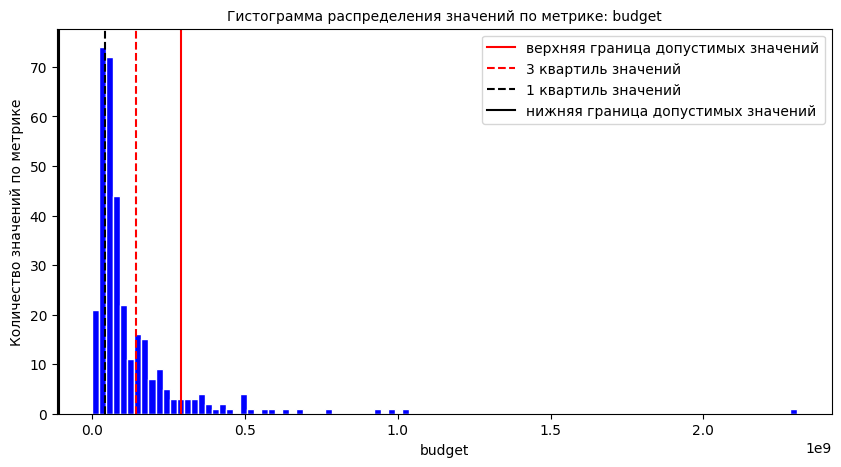

Доля значений, выходящих за верхнюю границу: 9.64%
Доля значений, выходящих за нижнюю границу: 0.00%
Названия фильмов, значения которых по метрике превышают верхнюю границу


array(['Батальонъ', 'Территория', 'Он - Дракон', 'Экипаж .',
       'Крякнутые каникулы', 'Время первых (2017)', 'Дуэлянт', 'Ледокол',
       'Защитники', 'БОЛЬШОЙ', 'Урфин Джюс и его деревянные солдаты',
       'Матильда', 'Салют-7', 'Последний богатырь', 'Легенда о Коловрате',
       'Движение вверх', 'Рубеж', 'Тренер', 'СОБИБОР (SOBIBOR)',
       'Гурвинек. Волшебная игра', 'Т-34', 'Снежная Королева: Зазеркалье',
       'Волки и Овцы: Ход Свиньей', 'Тобол', 'Девятая', 'Одесса',
       'Тайна Печати Дракона', 'Грех', 'Урфин Джюс возвращается',
       'Лев Яшин. Вратарь моей мечты', 'Союз спасения', 'Вторжение'],
      dtype=object)

In [123]:
# построение гистограммы распределения значений бюджета
histogram_plotting(state_movies, 'budget', 100, 10, 5)

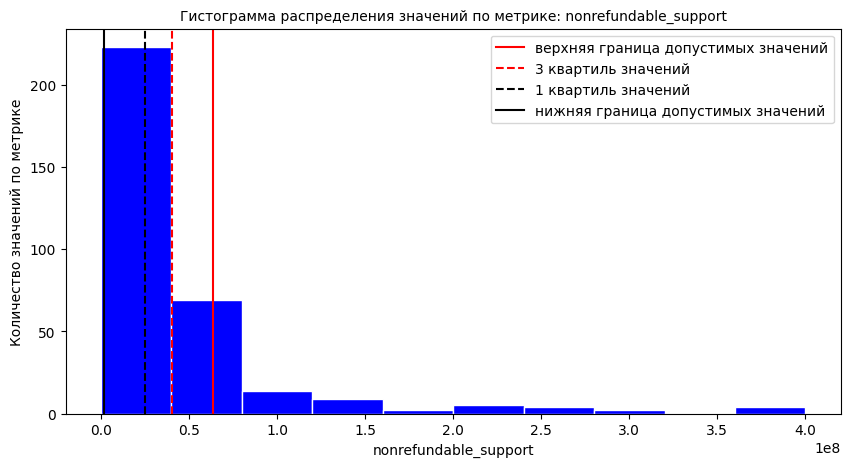

Доля значений, выходящих за верхнюю границу: 14.46%
Доля значений, выходящих за нижнюю границу: 2.71%
Названия фильмов, значения которых по метрике превышают верхнюю границу


array(['Невидимки', 'А зори здесь тихие..._', 'Призрак_.', 'Дуxless 2',
       'Левиафан.', 'Воин (2015)', 'Однажды._',
       'Смешарики. Легенда о золотом драконе', 'Савва. Сердце воина',
       'Он - Дракон', 'Экипаж .', 'Дама Пик', 'Время первых (2017)',
       'Дуэлянт', 'Ледокол', 'Защитники',
       'СНЕЖНАЯ КОРОЛЕВА 3. ОГОНЬ И ЛЁД', 'Притяжение (2016)', 'Ёлки 5',
       'БОЛЬШОЙ', 'Простая история .', 'Молот',
       'Урфин Джюс и его деревянные солдаты', 'Матильда', 'Напарник',
       'Салют-7', 'Легенда о Коловрате', 'Движение вверх', 'Рубеж',
       'Тренер', 'Черновик', 'Вечная жизнь Александра Христофорова',
       'Семь пар нечистых', 'Крымский мост. Сделано с любовью',
       'СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ', 'Баба Яга', 'Т-34', 'Тобол',
       'Большое путешествие', 'Братство', 'Миллиард', 'Девятая', 'Одесса',
       'Тайна Печати Дракона', 'Герой', 'Урфин Джюс возвращается',
       'Союз спасения', 'Вторжение'], dtype=object)

In [124]:
# построение гистограммы распределения значений невозвратных средств
histogram_plotting(state_movies, 'nonrefundable_support', 10, 10, 5)

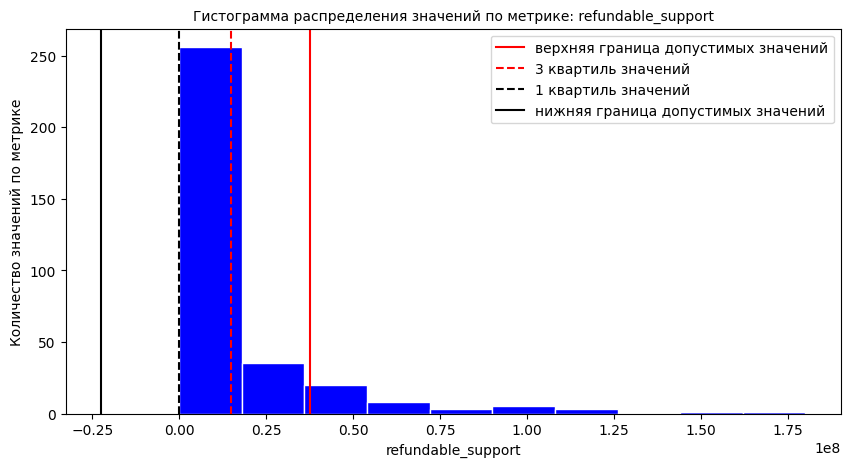

Доля значений, выходящих за верхнюю границу: 12.05%
Доля значений, выходящих за нижнюю границу: 0.00%
Названия фильмов, значения которых по метрике превышают верхнюю границу


array(['А зори здесь тихие..._', 'Смешарики. Легенда о золотом драконе',
       'Савва. Сердце воина', 'Дабл трабл', 'Страна чудес',
       'Супербобровы', 'Экипаж .', 'Крякнутые каникулы', 'Герой (2015)',
       'Кухня. Последняя битва', 'Время первых (2017)', 'Дуэлянт',
       'Вурдалаки', 'Ледокол', 'Защитники', 'Дед Мороз. Битва Магов',
       'СНЕЖНАЯ КОРОЛЕВА 3. ОГОНЬ И ЛЁД', 'Ночные стражи', 'Молот',
       'Матильда', 'Последний богатырь', 'Легенда о Коловрате',
       'Ёлки Новые', 'Три богатыря и принцесса Египта',
       'Ну, здравствуй, Оксана Соколова!', 'Черновик',
       'Принцесса и дракон', 'СУПЕРБОБРОВЫ. НАРОДНЫЕ МСТИТЕЛИ',
       'Три богатыря и наследница престола', 'Ёлки Последние', 'Т-34',
       'Снежная Королева: Зазеркалье', 'Волки и Овцы: Ход Свиньей',
       'Большое путешествие', 'Тайна Печати Дракона',
       'Фиксики против кработов', 'Союз спасения',
       'Иван Царевич и Серый Волк 4', 'Вторжение',
       '(Не)идеальный мужчина'], dtype=object)

In [125]:
# построение гистограммы распределения значений возвратных средств
histogram_plotting(state_movies, 'refundable_support', 10, 10, 5)

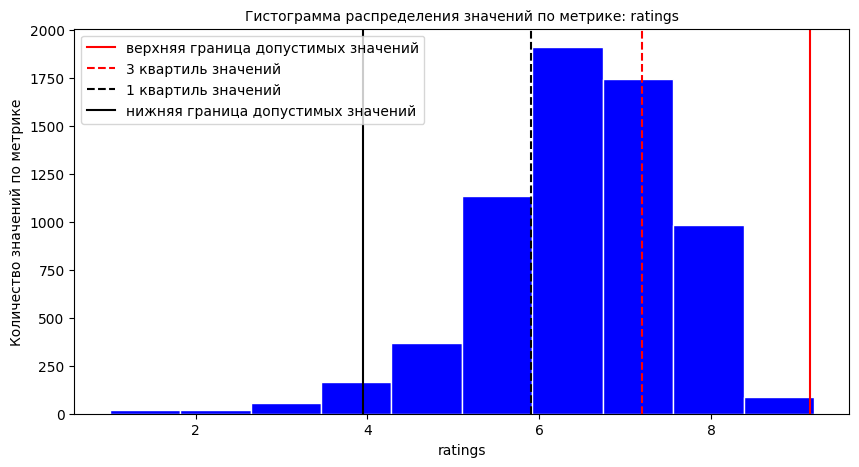

Доля значений, выходящих за верхнюю границу: 0.01%
Доля значений, выходящих за нижнюю границу: 2.39%
Названия фильмов, значения которых по метрике превышают верхнюю границу


array(['Друзья друзей'], dtype=object)

In [126]:
# построение гистограммы распределения значений рейтинга фильма
histogram_plotting(mkrf_movies, 'ratings', 10, 10, 5)

In [127]:
# вывод на экран минимальных и максимальных значений по показателю 'rating'
print('Максимальное значение рейтинга в наборе данных:', mkrf_movies['ratings'].max())
print('Минимальное значение рейтинга в наборе данных:', mkrf_movies['ratings'].min())

Максимальное значение рейтинга в наборе данных: 9.2
Минимальное значение рейтинга в наборе данных: 1.0


**Вывод по построенной визуализации**:

1. Аномальных значений по показателям бюджета и объемам государственной поддержки не обнаружено. Большие дотации от государства получают либо военно-исторические картины ("Т-34", "А зори здесь тихие"), исторические картины ("Матильда", "Движение вверх", "Время первых", "Легенда 17"), либо картины отечественной анимации ("Снежная королева", "Волки и овцы");
2. По показателю рейтинга фильма не обнаружены аномальные значения по критериям:
    * Значения рейтинга не могут быть отрицательными;
    * Значения рейтинга не могут превышать 10 баллов.

Таким образом, количественные данные не требуют дальнейшей обработки от аномальных максимальных и минимальных значений.

### Инициализация новых столбцов в наборе данных <a class = 'anchor' id = 'Предобработка_новыеСтолбцы'></a>

In [128]:
# инициализация столбца 'year' для хранения значений года выхода в прокат
mkrf_movies['year'] = mkrf_movies['show_start_date'].dt.year

# инициализация столбца с именем и фамилией главного режиссера
mkrf_movies['main_director'] = mkrf_movies['director'].str.split(',').str[0]

# инициализация столбца с главным жанром фильма
mkrf_movies['main_genre'] = mkrf_movies['genres'].str.split(',').str[0]

# инициализация столбца с доле государственной поддержки фильма
mkrf_movies['%_support'] = round((mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) / mkrf_movies['budget'] * 100, 2).fillna(0.0)

In [129]:
# вывод на экран структуры обновленного датасета
display(mkrf_movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year,main_director,main_genre,%_support
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0.0,0.0,NaN,Неизвестно,7.2,"боевик,драма,мелодрама",2015,Кевин Костнер,боевик,0.0
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,6+,0.0,0.0,NaN,Неизвестно,6.6,"драма,военный",2016,Е.Матвеев,драма,0.0
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,NaN,Неизвестно,6.8,"фантастика,боевик,триллер",2016,Тимур Бекмамбетов,фантастика,0.0
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,NaN,Неизвестно,6.8,"фантастика,боевик,триллер",2016,Тимур Бекмамбетов,фантастика,0.0
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0.0,0.0,NaN,Неизвестно,6.8,"фантастика,боевик,триллер",2015,Тимур Бекмамбетов,фантастика,0.0


**Вывод:**

1. Преобразованы типы данных в столбцах таблицы:
    * `mkrf_movies`:
        * **show_start_date** - дата премьеры фильма - значения преобразованы к типу datetime;
        * **ratings** - рейтинг фильма на КиноПоиске - значения преобразованы к типу float;
    * `mkrf_shows`:
        * **puNumbers** - номер прокатного удостоверения - значения преобразованы к типу string.
2. Проведена обработка пустых значений в данных:
    * `mkrf_movies`:
        * строки с пустыми значениями в столбцах **director**, **film_studio**, **production_country**, **title** исключены из общего набора;
        * пустые значения в категориальных параметрах **genres**, **producer**, **financing_source** заменены на значение "Неизвестно";
        * пустые значения в количественных параметрах **refundable_support**, **nonrefundable_support** заменены на 0.0;
3. Датасеты проверены на дубликаты и произведена очистка данных:
    * `mkrf_movies`:
        * явные дубликаты отсутствуют;
        * очищены неявные дубликаты в столбце **type**;
        * исключены строки с дубликатами в столбце **puNumber**;
        * обработаны значения в столбце **age_restriction** - извлечены значения возрастной категории;
    * `mkrf_shows`:
        * явные дубликаты отсутствуют;
        * неявные дубликаты отсутствуют;
4. Изучено состояние столбцов с количественными значениями:
    * аномальные значения не обнаружены;
5. Инициализированы новые столбцы в наборе данных:
    * Год проката фильма;
    * Имя и фамилия режиссера фильма;
    * Основной жанр фильма;
    * Доля государственной поддержки от общего бюджета фильма;

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Объединение наборов данных в единый датасет - инициализация переменной **data**;
2. Изучение количества фильмов, вышедших в прокат в каждый год. Расчет доли фильмов, для которых указана информация о прокате;
3. Изучение динамики сборов фильмов за каждый год;
4. Изучение медианного и среднего значения сборов за каждый год;
5. Изучение влияния возрастной категории фильма на величину сборов. Изучение данного факта в разрезе 2015 - 2019 гг.
6. Формирование вывода по итогам данного этапа.

In [131]:
# объединение наборов данных - инициализация переменной data
data = mkrf_movies.merge(mkrf_shows, on = 'puNumber', how = 'left')

### Изучение динамики кинопроката по количеству фильмов <a class = 'anchor' id = 'Исследование_динамика'></a>

In [141]:
# вывод на экран доли фильмов от общего набора, для которых указан год проката
print('Доля фильмов из набора данных с информацией о результатах проката: {:.2%}'.format(data[data['box_office'].isna()].shape[0] / data.shape[0]))

Доля фильмов из набора данных с информацией о результатах проката: 57.69%


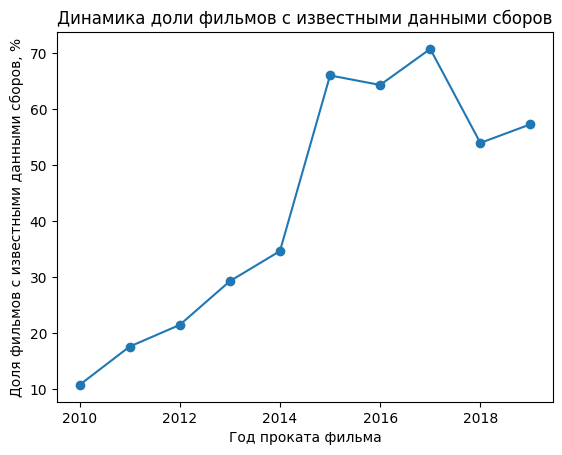

In [ ]:
# формирование свода по изменению доли фильмов с информацией о результатах проката
movies_per_year = (data.groupby('year').agg({'box_office' : 'count', 'title' : 'count'})
                       .rename(columns = {'box_office' : 'movies_boxOffice', 'title' : 'total_movies'}))
movies_per_year['%_boxOffice_movies'] = round(movies_per_year['movies_boxOffice'] / movies_per_year['total_movies'] * 100, 2)

# формирование графика динамики фильмов с известными кассовыми сборами
movies_per_year['%_boxOffice_movies'].plot(marker = 'o')
plt.title('Динамика доли фильмов с известными данными сборов', fontsize = 12)
plt.xlabel('Год проката фильма')
plt.ylabel('Доля фильмов с известными данными сборов, %')
plt.show()

**Вывод по построенной визуализации**:

Наиболее полно в имеющихся данных представлен период 2015 - 2019 гг. К моменту 2015 года доля фильмов с известными данными о кассовых сборов достигает порядка 70% и не опускается ниже 50% по ходу 4 последующих лет. 

### Изучение динамики кинопроката по суммарными кассовым сборам <a class = 'anchor' id = 'Изучение_касса'></a>

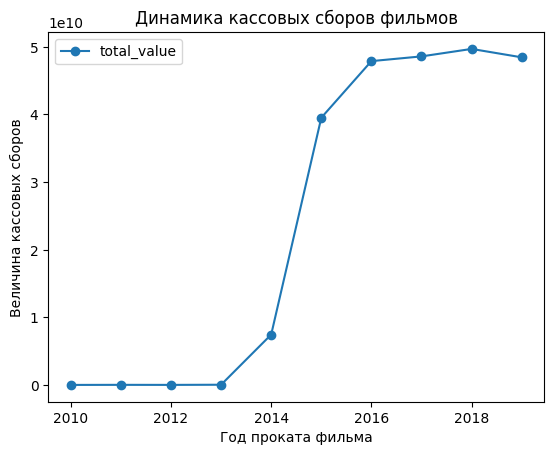

In [149]:
# формирование свода по изменению доли фильмов с информацией о результатах проката
box_office_per_year = (data.groupby('year').agg({'box_office' : 'sum'})
                       .rename(columns = {'box_office' : 'total_value'}))

# формирование графика динамики фильмов с известными кассовыми сборами
box_office_per_year.plot(marker = 'o')
plt.title('Динамика кассовых сборов фильмов', fontsize = 12)
plt.xlabel('Год проката фильма')
plt.ylabel('Величина кассовых сборов')
plt.show()

**Вывод по построенной визуализации**:

### Изучение медианного и среднего значений кассовых сборов за каждый год <a class = 'anchor' id = 'Исследование_статистика'></a>

In [151]:
# формирование свода с основными статистическими метриками по каждому году - инициализация переменной 'box_office_stat'
box_office_stat = data.pivot_table(index = 'year',
                                   values = 'box_office',
                                   aggfunc = ['sum', 'median', 'mean', 'min', 'max'])
box_office_stat.columns = ['total_value', 'median', 'mean', 'min', 'max']
box_office_stat

,total_value,median,mean,min,max
year,,,,,
2010,2.428654e+06,1700.000,2.313004e+04,0.0,1.446400e+06
2011,1.410276e+07,3000.000,1.293832e+05,125.0,1.161808e+07
2012,6.911073e+06,5560.000,5.441790e+04,0.0,2.311220e+06
2013,2.979971e+07,3522.500,1.619549e+05,0.0,1.995703e+07
2014,7.444952e+09,18160.000,2.668442e+07,0.0,1.016411e+09
2015,3.949737e+10,4920933.000,8.494057e+07,0.0,1.658861e+09
2016,4.786611e+10,3915041.020,9.117353e+07,0.0,2.048126e+09
2017,4.856371e+10,9968340.000,1.360328e+08,7900.0,2.779686e+09
2018,4.966836e+10,8911533.935,1.047856e+08,42469.0,2.271754e+09
